<a href="https://colab.research.google.com/github/MadhusudhanMasineni9/AdvanceMachineLearning/blob/main/Assignment2/epochs_50_Cats_and_Dogs_intro_to_dl_for_computer_vision_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"madhusudhanmms","key":"0c63b9b1a29112651613899eb560142f"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#we may need to skip this command
!kaggle competitions download -c dogs-vs-cats

 99% 801M/812M [00:05<00:00, 155MB/s]
100% 812M/812M [00:05<00:00, 164MB/s]


In [ ]:
!pwd
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

/content
chmod: cannot access 'train.zip': No such file or directory
403 - Forbidden
403 - Forbidden
 99% 805M/814M [00:03<00:00, 291MB/s]
100% 814M/814M [00:03<00:00, 245MB/s]


In [ ]:
!unzip -qq dogs-vs-cats-redux-kernels-edition.zip


In [ ]:
!unzip -qq train.zip
!unzip -qq test.zip

*Q1. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?*

**Copying images to training, validation, and test directories**

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

#### Data preprocessing steps:
Before feed our tensors into the model, lets do convert the data into Preprocessed floating point tensors.
1. Read all the pictures using tensorflow.keras.utils package.
2. Converting JPEG content into RGB grid of pixels.
3. Using numpy, tensorflow convert RGB grid of pixels into floating point tensors.
4. Resize the tensors.
5. Make the tensors into batches.


**Using `image_dataset_from_directory` to read images**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 17s 96ms/step - loss: 0.7223 - accuracy: 0.5035 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/50
63/63 [==============================] - 5s 71ms/step - loss: 0.7226 - accuracy: 0.5430 - val_loss: 0.6848 - val_accuracy: 0.5800
Epoch 3/50
63/63 [==============================] - 5s 74ms/step - loss: 0.6742 - accuracy: 0.6145 - val_loss: 0.6374 - val_accuracy: 0.6220
Epoch 4/50
63/63 [==============================] - 5s 70ms/step - loss: 0.6430 - accuracy: 0.6375 - val_loss: 0.5953 - val_accuracy: 0.6930
Epoch 5/50
63/63 [==============================] - 5s 70ms/step - loss: 0.6179 - accuracy: 0.6650 - val_loss: 0.5982 - val_accuracy: 0.6700
Epoch 6/50
63/63 [==============================] - 5s 71ms/step - loss: 0.5644 - accuracy: 0.6970 - val_loss: 0.5678 - val_accuracy: 0.6930
Epoch 7/50
63/63 [==============================] - 5s 71ms/step - loss: 0.5188 - accuracy: 0.7505 - val_loss: 0.5872 - val_accuracy: 0.6920
Epoch 8/50
6

**Displaying curves of loss and accuracy during training**

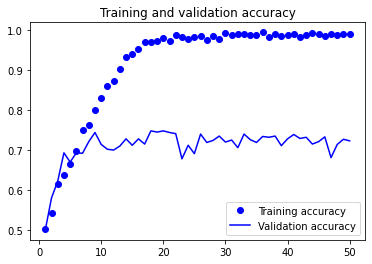

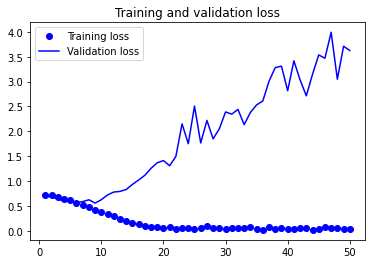

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 39ms/step - loss: 0.6020 - accuracy: 0.7260
Test accuracy: 0.726


*Q1. Ans:*

*Test Accuracy - 72.60%*

*Training Accuracy - 99.05%*

*Validation Accuracy - 72.30%*

### Using data augmentation

*Q2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?*

**Define a data augmentation stage to add to an image model**

In [ ]:
import os, shutil, pathlib

shutil.rmtree("./cats_vs_dogs_small_Q2", ignore_errors=True)

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 1000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2000)
make_subset("test", start_index=2000, end_index=2500)

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

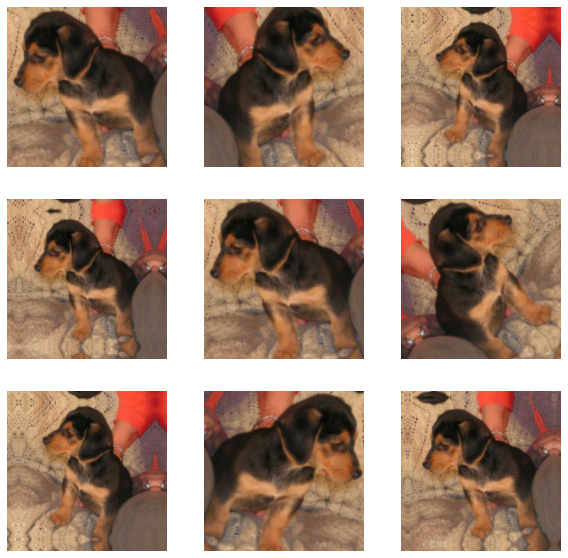

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 7s 98ms/step - loss: 0.6927 - accuracy: 0.5195 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/50
63/63 [==============================] - 6s 97ms/step - loss: 0.6932 - accuracy: 0.5205 - val_loss: 0.6922 - val_accuracy: 0.5110
Epoch 3/50
63/63 [==============================] - 8s 124ms/step - loss: 0.6910 - accuracy: 0.5405 - val_loss: 0.6837 - val_accuracy: 0.5920
Epoch 4/50
63/63 [==============================] - 9s 143ms/step - loss: 0.6916 - accuracy: 0.5405 - val_loss: 0.7175 - val_accuracy: 0.5030
Epoch 5/50
63/63 [==============================] - 6s 97ms/step - loss: 0.6845 - accuracy: 0.5740 - val_loss: 0.6690 - val_accuracy: 0.5900
Epoch 6/50
63/63 [==============================] - 6s 95ms/step - loss: 0.6680 - accuracy: 0.5915 - val_loss: 0.6577 - val_accuracy: 0.5950
Epoch 7/50
63/63 [==============================] - 8s 118ms/step - loss: 0.6566 - accuracy: 0.6260 - val_loss: 0.6754 - val_accuracy: 0.5710
Epoch 8/50

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 38ms/step - loss: 0.4517 - accuracy: 0.8085
Test accuracy: 0.808


**Q2 ANS:**

*Test Accuracy - 80.85%*

*Training Accuraccy - 87.30%*

*Validation Accuracy - 80.60%*

*Q3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.* 


In [ ]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 1000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=2000)
make_subset("validation", start_index=2000, end_index=2500)
make_subset("test", start_index=2500, end_index=3000)

In [ ]:
#Defining a new convnet with increased training samples,image augmentation and dropout

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation1.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 8s 99ms/step - loss: 0.6947 - accuracy: 0.4885 - val_loss: 0.6930 - val_accuracy: 0.5690
Epoch 2/50
63/63 [==============================] - 9s 137ms/step - loss: 0.6931 - accuracy: 0.5015 - val_loss: 0.6936 - val_accuracy: 0.4990
Epoch 3/50
63/63 [==============================] - 6s 95ms/step - loss: 0.6912 - accuracy: 0.5230 - val_loss: 0.7435 - val_accuracy: 0.4990
Epoch 4/50
63/63 [==============================] - 7s 107ms/step - loss: 0.6955 - accuracy: 0.5145 - val_loss: 0.6939 - val_accuracy: 0.4970
Epoch 5/50
63/63 [==============================] - 7s 103ms/step - loss: 0.6915 - accuracy: 0.5240 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 6/50
63/63 [==============================] - 6s 95ms/step - loss: 0.6914 - accuracy: 0.5355 - val_loss: 0.6767 - val_accuracy: 0.6020
Epoch 7/50
63/63 [==============================] - 6s 94ms/step - loss: 0.6792 - accuracy: 0.5795 - val_loss: 0.6647 - val_accuracy: 0.5910
Epoch 8/50

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation1.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 39ms/step - loss: 0.5548 - accuracy: 0.7015
Test accuracy: 0.701


*Q3 Ans:*

*Test Accuracy - 70.15%*

*Training Accuraccy - 82.65%*

*Validation Accuracy - 75.40%*

Increasing the training sample to 2000, keeping the Validation and test sets the same as before(500 samples)

Summary:
When I choose 1000 training samples without any optimization for convolution network to set a baseline got the classification accuracy in the vicinity of 72.60%. There was overfitting issue here.
With optimization technique by implementing the optimal number of epochs with data augmentation, Regularization and Dropout. By using data augmentation improved the model to reach an accuracy of 80.85%.
Lastly tried to find the optimal training sample to increase classification accuracy.
By manipulating training sample and usage of other optimization techniques that the best ways prevent overfitting are as follows and observed as below.
1. Get more training samples - Increasing the training sample is not always possible. One way of optimally using the less training samples is Data Augmentation.
2. Reducing the capacity of the network - It was observed that reducing the size of the model. The number of learnable parameters in the model which is essentially the number of layers and the number of units in layers, considerably prevents overfitting
3. Adding weight regularization - Putting constraint on the complexity of a network by forcing the weights to take only small values, which helps in regularizing the distribution of the weight values which in turns helps in preventing or minimizing overfitting
4. Adding dropout - Zeroing out a number of output features of the layer during training, helps in minimizing overfitting as well. The dropout rate is the fraction of the features that are zeroed out.

*Q4. Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.*
*A highly effective approach to apply deep learning on small image datasets is to use a pretrained model. A pretrained model is a model that was previously trained on a large dataset, typically on a large-scale image-classification task.*
*In this case, we will use a large convnet trained on the ImageNet dataset (1.4 million labeled images and 1,000 different classes). We will use VGG16 architecture, however, htere are multiple such architectures available namely VGG, ResNet, Inception, Xception, and so on.*
*Many other image-classification models (all pretrained on the ImageNet dataset) are available as part of keras.applications:*
1. Xception
2. ResNet
3. MobileNet
4. EfficientNet
5. DenseNet etc.

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

**Feature extraction without data augmentation using a pretrained model**

Extracting the VGG16 features and corresponding labels

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 20ms/step


In [ ]:
train_features.shape

(2000, 5, 5, 512)

In [ ]:
import tensorflow as tf, keras
# Defining and training the densely connected classifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

input_net = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(input_net)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(input_net, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=30,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 2s 14ms/step - loss: 20.7085 - accuracy: 0.9190 - val_loss: 13.5963 - val_accuracy: 0.9310
Epoch 2/30
63/63 [==============================] - 1s 15ms/step - loss: 3.8733 - accuracy: 0.9730 - val_loss: 4.2416 - val_accuracy: 0.9720
Epoch 3/30
63/63 [==============================] - 1s 11ms/step - loss: 1.6793 - accuracy: 0.9885 - val_loss: 4.6011 - val_accuracy: 0.9740
Epoch 4/30
63/63 [==============================] - 1s 10ms/step - loss: 1.2346 - accuracy: 0.9880 - val_loss: 9.6518 - val_accuracy: 0.9520
Epoch 5/30
63/63 [==============================] - 1s 12ms/step - loss: 0.9458 - accuracy: 0.9900 - val_loss: 3.8075 - val_accuracy: 0.9770
Epoch 6/30
63/63 [==============================] - 1s 9ms/step - loss: 0.9390 - accuracy: 0.9930 - val_loss: 4.5990 - val_accuracy: 0.9780
Epoch 7/30
63/63 [==============================] - 0s 6ms/step - loss: 0.3099 - accuracy: 0.9975 - val_loss: 4.2226 - val_accuracy: 0.9790
Epoch 8/30
63

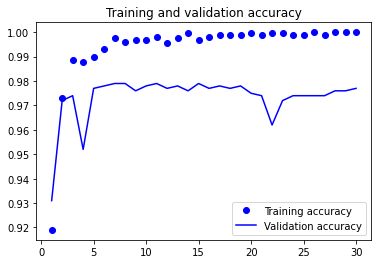

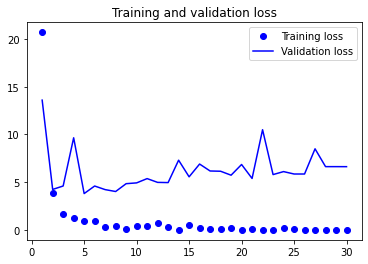

In [ ]:
#Plotting the results
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Feature extraction with data augmentation using a pretrained model**
### Instantiating and freezing the VGG16 convolutional base



In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [ ]:
#Printing the list of trainable weights before and after freezing

conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 16s 213ms/step - loss: 17.5632 - accuracy: 0.9005 - val_loss: 4.1195 - val_accuracy: 0.9700
Epoch 2/50
63/63 [==============================] - 13s 203ms/step - loss: 7.9729 - accuracy: 0.9415 - val_loss: 2.8298 - val_accuracy: 0.9720
Epoch 3/50
63/63 [==============================] - 13s 197ms/step - loss: 4.7262 - accuracy: 0.9575 - val_loss: 2.6846 - val_accuracy: 0.9770
Epoch 4/50
63/63 [==============================] - 13s 201ms/step - loss: 5.7877 - accuracy: 0.9570 - val_loss: 10.5555 - val_accuracy: 0.9410
Epoch 5/50
63/63 [==============================] - 12s 194ms/step - loss: 4.9176 - accuracy: 0.9635 - val_loss: 6.2699 - val_accuracy: 0.9650
Epoch 6/50
63/63 [==============================] - 12s 192ms/step - loss: 3.8110 - accuracy: 0.9675 - val_loss: 5.7461 - val_accuracy: 0.9610
Epoch 7/50
63/63 [==============================] - 12s 192ms/step - loss: 3.2697 - accuracy: 0.9690 - val_loss: 3.6911 - val_accuracy: 0.97

A pretrained VGG16 model with Fine-tuning
Fine-tuning consists of unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly added part of the model (in this case, the fully connected classifier) and these top layers. This is called fine-tuning because it slightly adjusts the more abstract representations of the model being reused in order to make them more relevant for the problem at hand.

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 16s 224ms/step - loss: 0.6457 - accuracy: 0.9880 - val_loss: 2.2182 - val_accuracy: 0.9740
Epoch 2/50
63/63 [==============================] - 14s 221ms/step - loss: 0.4408 - accuracy: 0.9890 - val_loss: 1.8910 - val_accuracy: 0.9740
Epoch 3/50
63/63 [==============================] - 14s 215ms/step - loss: 0.3102 - accuracy: 0.9910 - val_loss: 2.5833 - val_accuracy: 0.9770
Epoch 4/50
63/63 [==============================] - 14s 214ms/step - loss: 0.3672 - accuracy: 0.9930 - val_loss: 2.1024 - val_accuracy: 0.9750
Epoch 5/50
63/63 [==============================] - 14s 216ms/step - loss: 0.3433 - accuracy: 0.9895 - val_loss: 2.0523 - val_accuracy: 0.9770
Epoch 6/50
63/63 [==============================] - 14s 221ms/step - loss: 0.4722 - accuracy: 0.9900 - val_loss: 1.7767 - val_accuracy: 0.9800
Epoch 7/50
63/63 [==============================] - 14s 214ms/step - loss: 0.2517 - accuracy: 0.9930 - val_loss: 2.1639 - val_accuracy: 0.9740

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 8s 118ms/step - loss: 2.0327 - accuracy: 0.9760
Test accuracy: 0.976


### Summary
*With a pre-trained model with out Augumentation, we got a validation accuracy of 97.60% while train the small model from the scratch. We may not get the same accuracy with pretrained labels/features without Augmentation. The validation accuracy of about 97.10% with training the small model from scratch.*

*The plots also indicates that we are overfitting from the start eventhough by using dropout with a fairly large rate. Because we didn't use data augmentation technique which is essential for preventing overfitting with small image datasets.*

*With a Pre-trained model without data Augmentation:
A model accuracy always depends on the set of samples one evaluates,some sample sets may be more difficult than others, and strong results on one set won’t necessarily fully translate to all other sets. Because of this pretrained model With Augmentation there was just a minor increase in the accuracy from 97.60% to 99.65%.
by using Pretrained model with fine tuning we get a test accuracy of 97.60%.
these accuracy results might change within one percentage range of point.*